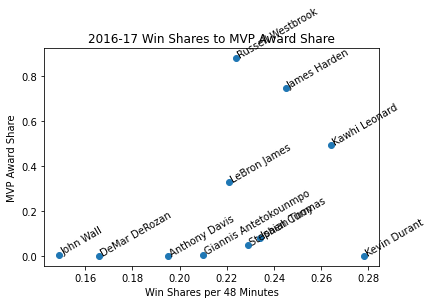

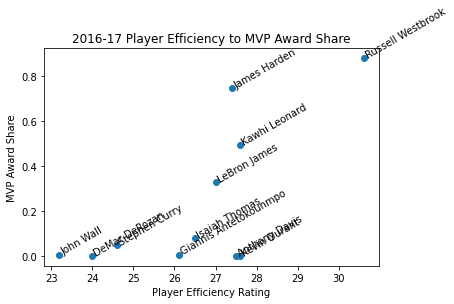

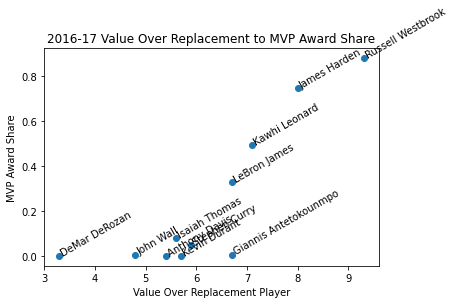

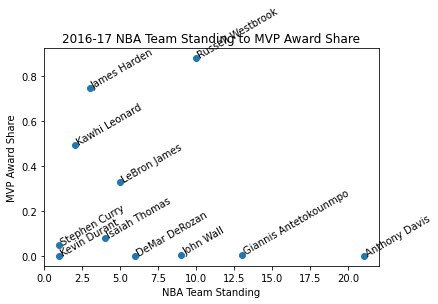

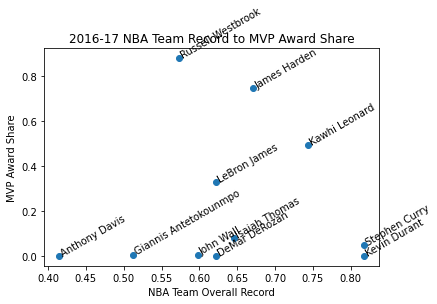

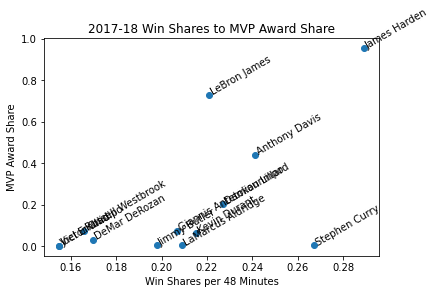

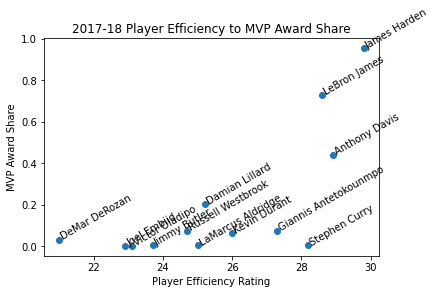

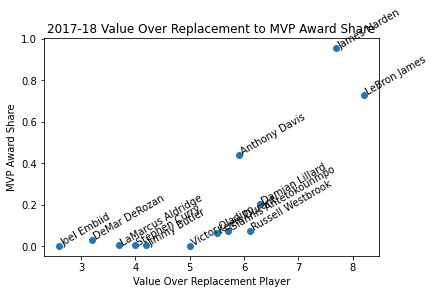

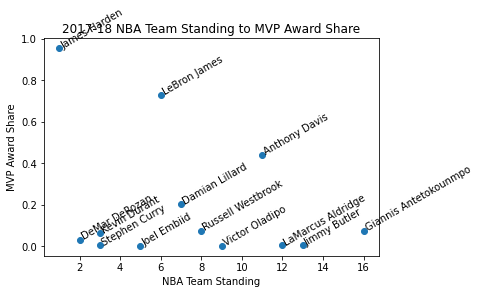

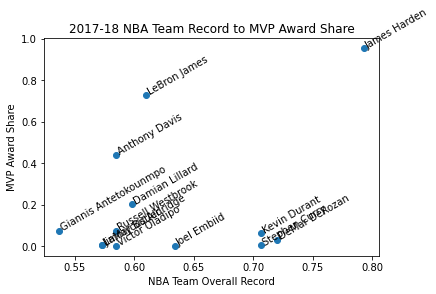

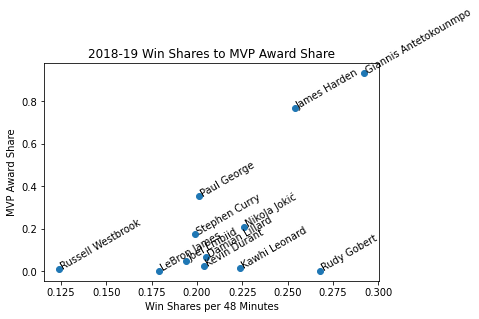

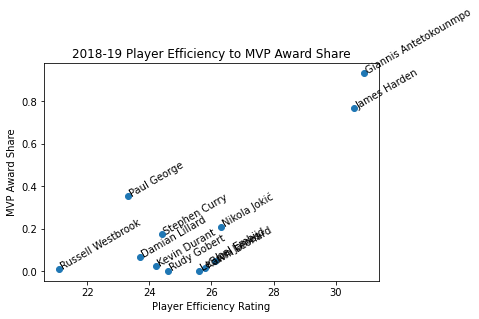

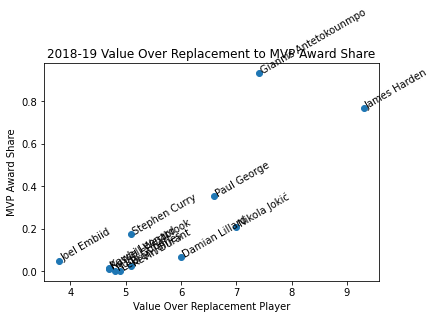

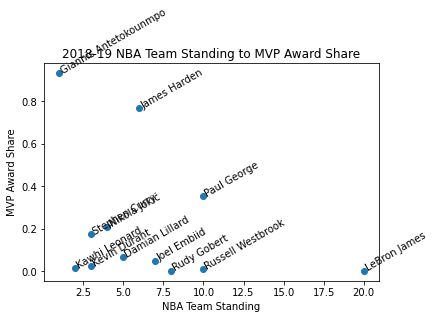

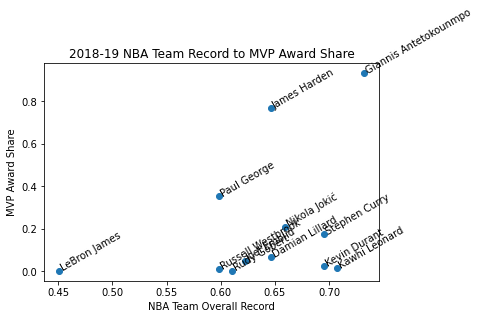

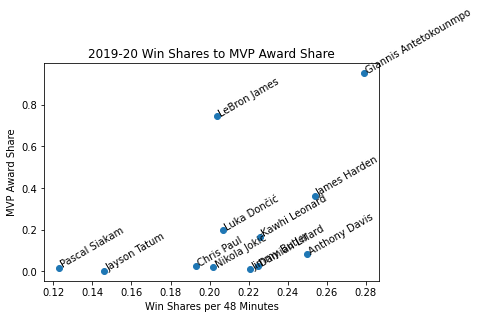

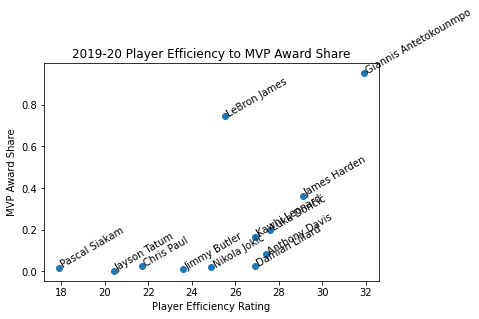

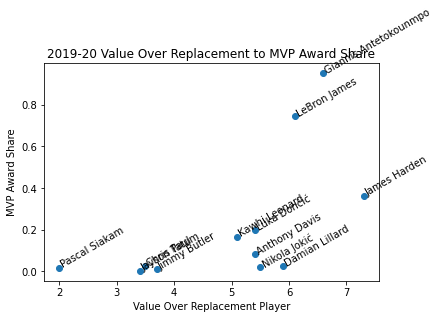

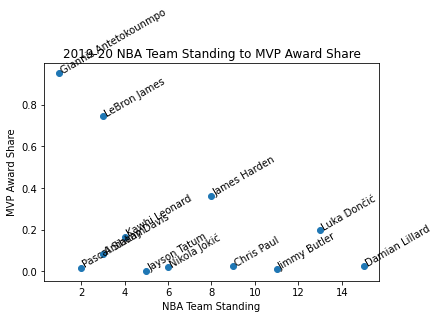

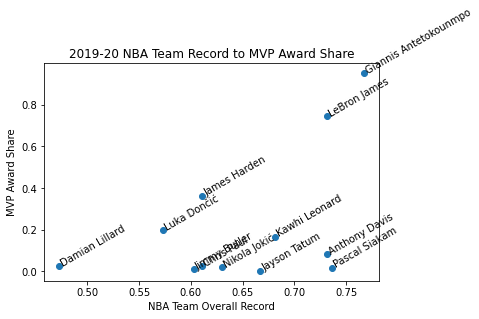

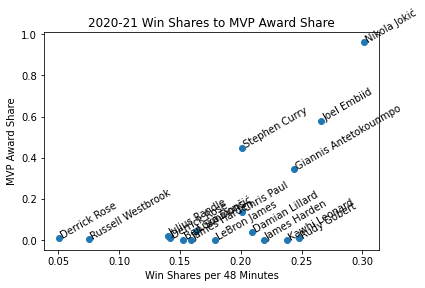

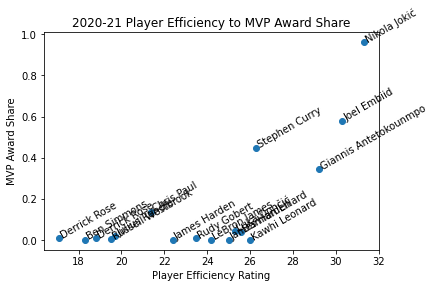

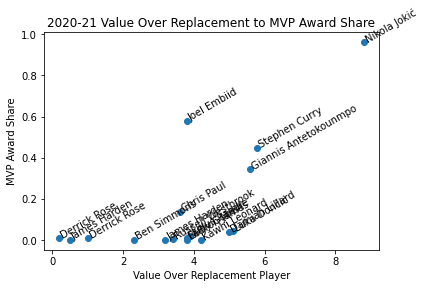

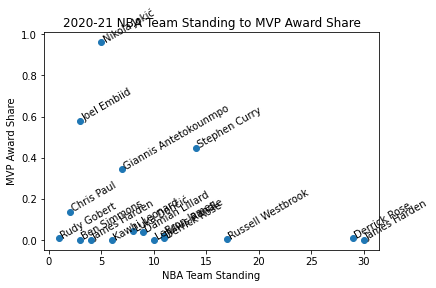

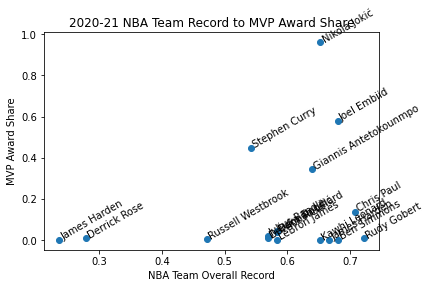

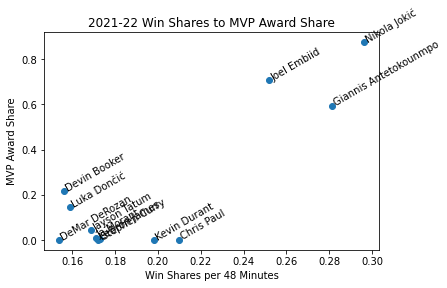

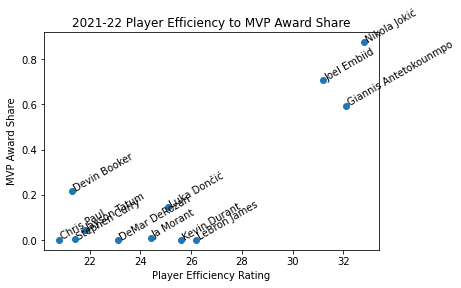

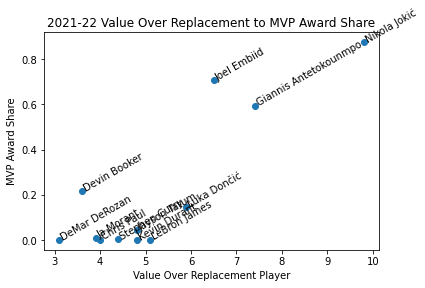

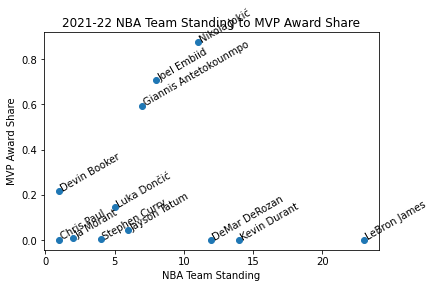

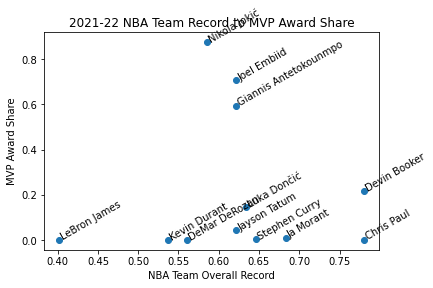

     PER  WS/48  VORP  Rk  Overall
0   30.6  0.224   9.3  10    0.573
1   27.5  0.195   5.4  21    0.415
2   27.6  0.264   7.1   2    0.744
3   27.0  0.221   6.7   5    0.622
4   27.4  0.245   8.0   3    0.671
..   ...    ...   ...  ..      ...
7   32.8  0.296   9.8  11    0.585
8   31.2  0.252   6.5   8    0.622
9   25.1  0.159   5.9   5    0.634
10  21.4  0.173   4.4   4    0.646
11  21.8  0.169   4.8   6    0.622

[77 rows x 5 columns]
    Share
0   0.879
1   0.002
2   0.495
3   0.330
4   0.746
..    ...
7   0.875
8   0.706
9   0.146
10  0.004
11  0.043

[77 rows x 1 columns]
     PER  WS/48  VORP  Rk  Overall
8   25.6  0.179   4.9  20    0.451
2   26.3  0.226   7.0   4    0.659
9   18.8  0.142   1.0  11    0.569
11  26.0  0.215   5.5   3    0.707
2   27.6  0.264   7.1   2    0.744
5   22.9  0.155   2.6   5    0.634
6   26.9  0.225   5.9  15    0.473
13  26.3  0.201   5.8  14    0.542
2   25.0  0.209   3.7  12    0.573
1   25.6  0.198   4.8  14    0.537
3   24.6  0.268   4.8   8    

In [2]:
import sklearn.linear_model as lm
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Year values
vals = ['2016-17', '2017-18', '2018-19', '2019-20', '2020-21', '2021-22']

# X represents the three major MVP predictors (WS/48, PER, VORP); y represents the MVP award share
X = []
y = []

for val in vals:
    # File paths
    x1_path = f'../data/{val}.csv'
    x2_path = f'../data/{val} Standings.csv'
    y_path = f'../data/{val} MVP.csv'

    # Dataframes
    df_x1 = pd.read_csv(x1_path, usecols=["Player", "Tm", "WS/48", "PER", "VORP"])
    df_x2 = pd.read_csv(x2_path, usecols=["Rk", "Tm", "Overall"])
    df_y = pd.read_csv(y_path, usecols=["Player", "Share"])

    # Get output
    output = pd.merge(df_x1, df_x2, on="Tm", how="inner")
    output = pd.merge(output, df_y, on="Player", how="inner")

    # Add new data to X and y for Multiple Linear Regression
    X.append(output.drop(columns=["Share", "Player", "Tm"]))
    y.append(output.drop(columns=["Player", "Tm", "Rk", "Overall", "WS/48", "PER", "VORP"]))

    # Win Share Plot
    fig, ax = plt.subplots()
    plt.scatter(output["WS/48"], output["Share"])
    plt.xlabel("Win Shares per 48 Minutes")
    plt.ylabel("MVP Award Share")
    plt.title(f'{val} Win Shares to MVP Award Share')

    for i in range(len(output["WS/48"])):
        ax.text(output["WS/48"][i], output["Share"][i], output["Player"][i], rotation=30)

    plt.show()

    # Player Efficiency Rating Plot
    fig, ax = plt.subplots()
    plt.scatter(output["PER"], output["Share"])
    plt.xlabel("Player Efficiency Rating", )
    plt.ylabel("MVP Award Share")
    plt.title(f'{val} Player Efficiency to MVP Award Share')

    for i in range(len(output["PER"])):
        ax.text(output["PER"][i], output["Share"][i], output["Player"][i], rotation=30)

    plt.show()

    # Value Over Replacement Player Plot
    fig, ax = plt.subplots()
    plt.scatter(output["VORP"], output["Share"])
    plt.xlabel("Value Over Replacement Player")
    plt.ylabel("MVP Award Share")
    plt.title(f'{val} Value Over Replacement to MVP Award Share')

    for i in range(len(output["VORP"])):
        ax.text(output["VORP"][i], output["Share"][i], output["Player"][i], rotation=30)

    plt.show()

    # Rank Plot
    fig, ax = plt.subplots()
    plt.scatter(output["Rk"], output["Share"])
    plt.xlabel("NBA Team Standing")
    plt.ylabel("MVP Award Share")
    plt.title(f'{val} NBA Team Standing to MVP Award Share')

    for i in range(len(output["Rk"])):
        ax.text(output["Rk"][i], output["Share"][i], output["Player"][i], rotation=30)

    plt.show()

    # Overall Record Plot
    fig, ax = plt.subplots()
    plt.scatter(output["Overall"], output["Share"])
    plt.xlabel("NBA Team Overall Record")
    plt.ylabel("MVP Award Share")
    plt.title(f'{val} NBA Team Record to MVP Award Share')

    for i in range(len(output["Overall"])):
        ax.text(output["Overall"][i], output["Share"][i], output["Player"][i], rotation=30)

    plt.show()

# Dataframe concatenation for X and y variables
X = pd.concat(X)
y = pd.concat(y)
print(X)
print(y)

# Training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
print(X_test)
model = lm.LinearRegression()
model.fit(X_train, y_train)

# Predictions
predictions = model.predict(X_test)
print('Mean Squared Error : ', mean_squared_error(y_test, predictions))
print('Mean Absolute Error : ', mean_absolute_error(y_test, predictions))
print('R2 Score : ', r2_score(y_test, predictions))

In [54]:
yr = input('Enter the NBA year in the form XXXX-XX.')

try:
    df_x1 = pd.read_csv(f'../data/{yr}.csv', usecols=["Player", "Tm", "WS/48", "PER", "VORP", "G"]).dropna()
    df_x2 = pd.read_csv(f'../data/{yr} Standings.csv', usecols=["Rk", "Tm", "Overall"])
    output = pd.merge(df_x1, df_x2, on="Tm", how="inner")
    predictions = model.predict(output.drop(columns=["Player", "G", "Tm"]))
    res = []
    worst = [0, '']
    brooks = ''
    for i in range(len(predictions)):
        if predictions[i] > 0.1 and output["G"][i] > 50:
            res.append([float(predictions[i]), output["Player"][i]])
        else:
            if output["G"][i] > 50 and float(predictions[i]) < worst[0]:
                worst = [float(predictions[i]), output["Player"][i]]
            if output["Player"][i] == "Dillon Brooks":
                brooks = "The brick has a predicted vote share of " + f'{predictions[i][0]:.3f}' + "."
    res.sort(reverse=True)
    for i in range(len(res)):
        player = res[i]
        if i == 0:
            print("The predicted MVP is " + player[1] + ", with a vote share of " + f'{player[0]:.3f}' + ".")
            print("\nOther notable predicted vote shares:")
        else:
            print(player[1] + " - " + f'{player[0]:.3f}')
    print()
    print("The lowest predicted player is " + worst[1] + ", with a predicted vote share of " + f'{worst[0]:.3f}' + ".")
    print()
    print(brooks)
except FileNotFoundError:
    print('Either the advanced player statistics or the standings file is missing.')
x = pd.merge(df_x1, df_x2, on="Tm", how="inner")



The predicted MVP is Nikola Jokić, with a vote share of 0.649.

Other notable predicted vote shares:
Joel Embiid - 0.475
Luka Dončić - 0.441
Giannis Antetokounmpo - 0.346
Shai Gilgeous-Alexander - 0.329
Jimmy Butler - 0.326
Damian Lillard - 0.263
Anthony Davis - 0.205
Jayson Tatum - 0.169
Domantas Sabonis - 0.160
Stephen Curry - 0.140
Donovan Mitchell - 0.129
Tyrese Haliburton - 0.127

The lowest predicted player is P.J. Tucker, with a predicted vote share of -0.775.

The brick has a predicted vote share of -0.712.
